In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\\DataSets\\Attendance_data.csv")

In [5]:
df.head(5)

,ID,Name,Date,Day,Status,Time_In,Time_Out,Department
0,107,Neha,2024-01-01,Monday,Present,09:07,17:28,Operations
1,107,Vikas,2024-01-02,Tuesday,Present,09:10,17:23,Finance
2,104,Kiran,2024-01-03,Wednesday,Present,09:01,17:23,Finance
3,112,Sneha,2024-01-04,Thursday,Present,09:20,17:00,HR
4,112,Vikas,2024-01-05,Friday,Present,09:16,17:26,Operations


In [7]:
df.shape

(1000, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          1000 non-null   int64 
 1   Name        1000 non-null   object
 2   Date        1000 non-null   object
 3   Day         1000 non-null   object
 4   Status      1000 non-null   object
 5   Time_In     817 non-null    object
 6   Time_Out    817 non-null    object
 7   Department  1000 non-null   object
dtypes: int64(1), object(7)
memory usage: 62.6+ KB


In [11]:
df.isnull().sum()

ID              0
Name            0
Date            0
Day             0
Status          0
Time_In       183
Time_Out      183
Department      0
dtype: int64

In [13]:
df.describe()

,ID
count,1000.000000
mean,110.238000
std,5.825057
min,101.000000
25%,105.000000
50%,110.000000
75%,115.000000
max,120.000000


In [15]:
df['Present_Flag'] = df['Status'].map({'Present': 1, 'Absent': 0})

In [17]:
#Unique Names
unique_names = df['Name'].unique()
print(unique_names)

['Neha' 'Vikas' 'Kiran' 'Sneha' 'Rahul' 'Pooja' 'Rohit' 'Amit' 'Anjali'
 'Arjun']


In [19]:
# Attendance percentage per person
attendance_percent = df.groupby('Name')['Present_Flag'].mean() * 100
print(attendance_percent)

Name
Amit      82.568807
Anjali    83.333333
Arjun     87.387387
Kiran     79.166667
Neha      89.000000
Pooja     82.608696
Rahul     77.884615
Rohit     81.818182
Sneha     76.595745
Vikas     75.268817
Name: Present_Flag, dtype: float64


In [21]:
# Absents count
absent_count = df[df['Present_Flag'] == 0]['Name'].value_counts()
print(absent_count)

Name
Rahul     23
Vikas     23
Sneha     22
Kiran     20
Amit      19
Rohit     18
Anjali    17
Pooja     16
Arjun     14
Neha      11
Name: count, dtype: int64


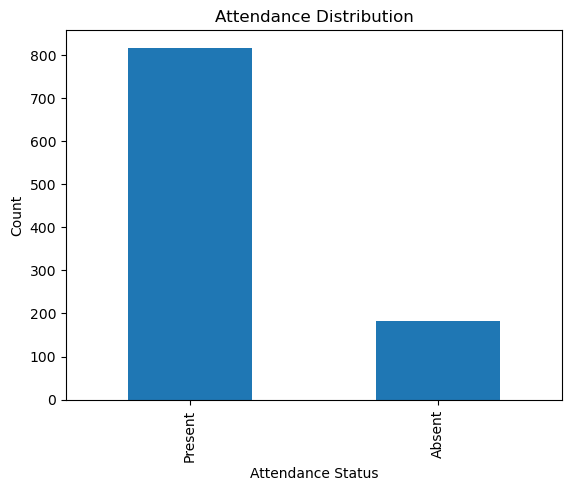

In [23]:
#Attendance Distribution
df['Status'].value_counts().plot(kind='bar')
plt.title("Attendance Distribution")
plt.xlabel("Attendance Status")
plt.ylabel("Count")
plt.show()

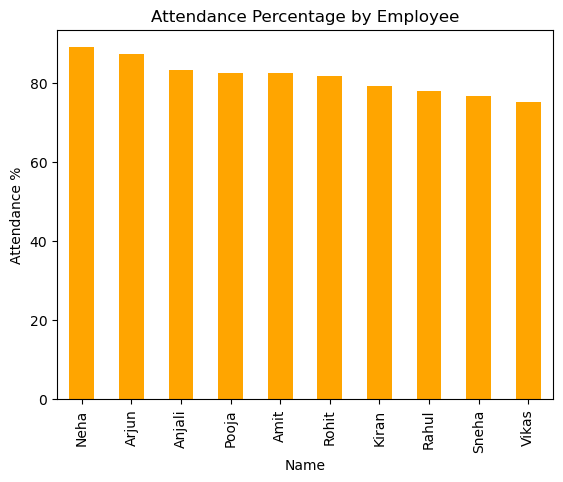

In [25]:
#Attendance Percentage per Employee
attendance_percent = (
    df.groupby('Name')['Present_Flag']
    .mean()
    .sort_values(ascending=False) * 100
)

attendance_percent.plot(kind='bar', color = "orange")
plt.title("Attendance Percentage by Employee")
plt.ylabel("Attendance %")
plt.show()

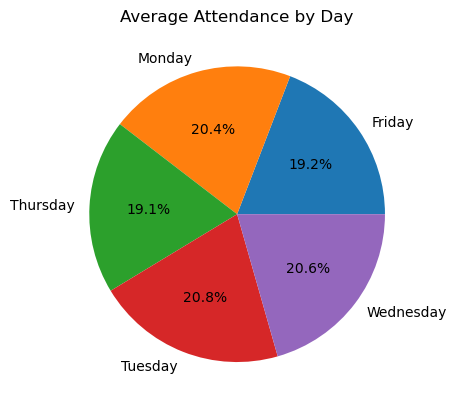

In [27]:
# Average attendance by day
day_attendance = df.groupby('Day')['Present_Flag'].mean()

# Pie chart
plt.pie(day_attendance, labels=day_attendance.index, autopct='%1.1f%%')
plt.title("Average Attendance by Day")
plt.show()

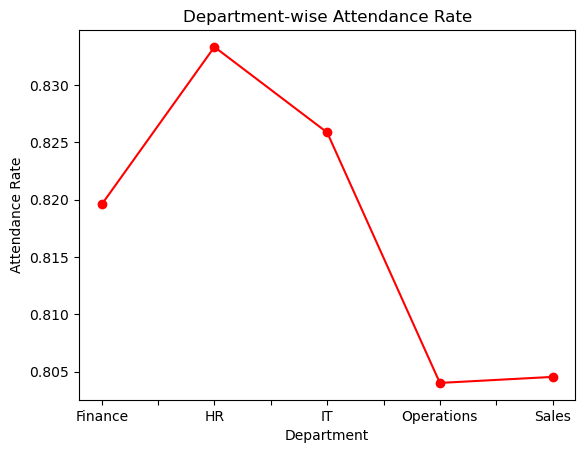

In [29]:
#Department - Wise Attendance
dept_attendance = df.groupby('Department')['Present_Flag'].mean()
dept_attendance.plot(kind='line', marker='o',color ="red")  # marker for better visibility
plt.title("Department-wise Attendance Rate")
plt.ylabel("Attendance Rate")
plt.xlabel("Department")
plt.show()

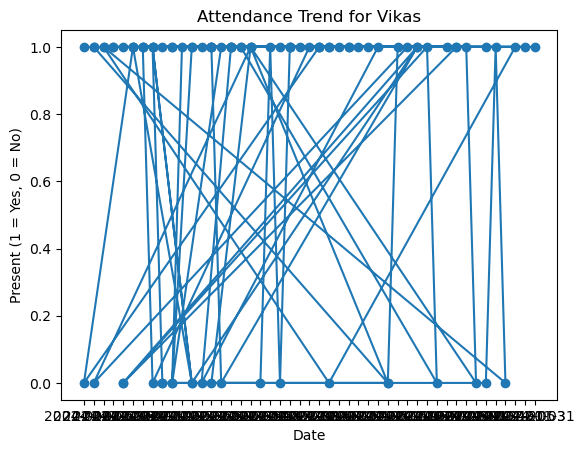

In [35]:
# Individual Attendance Trend
person = "Vikas"
person_data = df[df['Name'] == person]

plt.plot(person_data['Date'], person_data['Present_Flag'], marker='o')
plt.title(f"Attendance Trend for {person}")
plt.xlabel("Date")
plt.ylabel("Present (1 = Yes, 0 = No)")
plt.show()


# Feature Engineering For ML

In [37]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Sorting 
df = df.sort_values(['ID', 'Date'])

In [39]:
# Feature: day of week
df['Day_Num'] = df['Date'].dt.weekday + 1

In [41]:
#create rolling attendance (past 3 days) per employee
df['Rolling_Attendance_3'] = (
    df.groupby('ID')['Present_Flag']
    .rolling(window=3, min_periods=1)
    .mean()
    .reset_index(level=0, drop=True)
)

In [43]:
# Final Ml Dataset
df_ml = df[['Rolling_Attendance_3', 'Day_Num', 'Present_Flag']]
df_ml.head()

,Rolling_Attendance_3,Day_Num,Present_Flag
181,1.0,2,1
721,1.0,2,1
844,1.0,5,1
185,1.0,6,1
186,1.0,7,1


# Machine Learning Model (Absence Prediction)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [47]:
# Features and target
X = df_ml[['Rolling_Attendance_3', 'Day_Num']]
y = df_ml['Present_Flag']

In [51]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [53]:
# Train Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [55]:
#Predict
y_pred = model.predict(X_test)

In [57]:
#Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.71      0.32      0.44        37
           1       0.86      0.97      0.91       163

    accuracy                           0.85       200
   macro avg       0.78      0.65      0.68       200
weighted avg       0.83      0.85      0.83       200



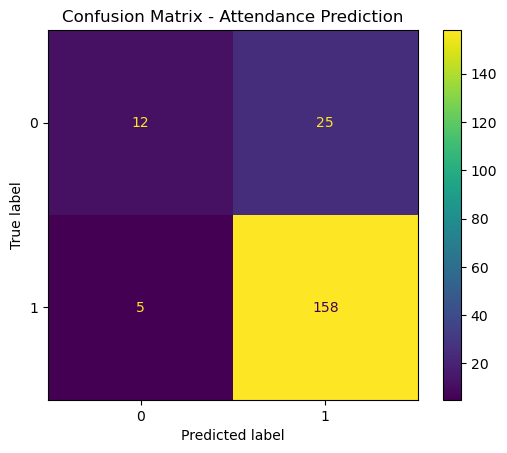

In [60]:
# Confusion Matrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Attendance Prediction")
plt.show()


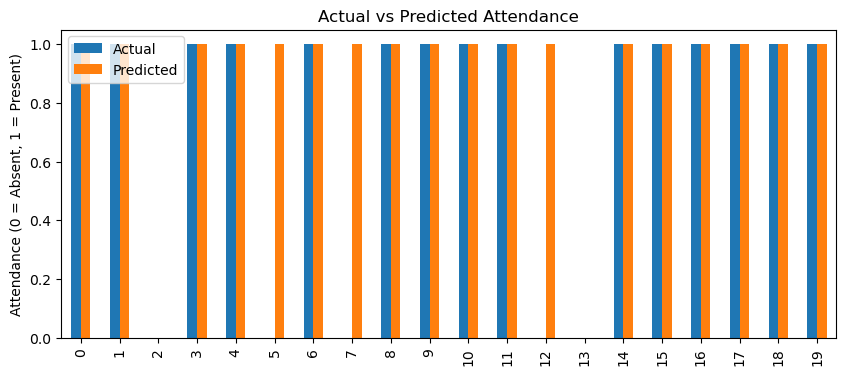

In [62]:
# Actual VS Predicted Attendance
comparison = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

comparison.head(20).plot(kind='bar', figsize=(10,4))
plt.title("Actual vs Predicted Attendance")
plt.ylabel("Attendance (0 = Absent, 1 = Present)")
plt.show()


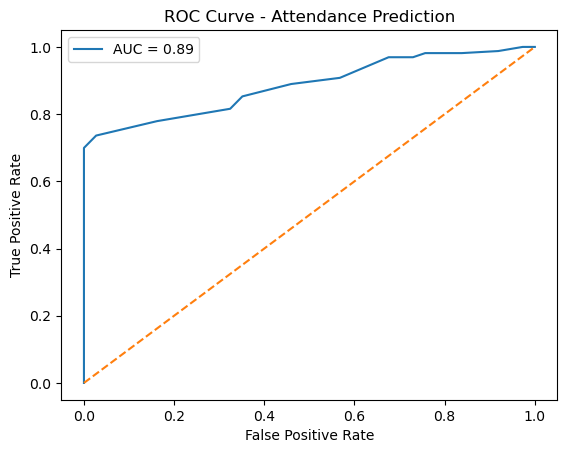

In [64]:
# ROC Curve
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label="AUC = " + str(round(roc_auc,2)))
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Attendance Prediction")
plt.legend()
plt.show()
